<a href="https://colab.research.google.com/github/morteza-sakifard/density-estimation/blob/main/Parametric_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# Generate 2D Class

In [2]:
def get_dataset(mean, cov, size):
  dataset = np.random.multivariate_normal(mean, cov, size)
  return pd.DataFrame(dataset)

# Get Dataset Extremum

In [3]:
def get_extremum(dataset):
  return (dataset.min(), dataset.max())

# Generate Grid

In [4]:
def get_grid(dataset):
  x_min, x_max = get_extremum(dataset.iloc[:, 0])
  y_min, y_max = get_extremum(dataset.iloc[:, 1])
  return np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

# Plot Dataset

In [5]:
def plot_dataset(dataset, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.plot(dataset.iloc[:, 0], dataset.iloc[:, 1], '.', markersize=10)
  ax.axis('equal')
  ax.set_title(title)
  fig.show()

# Plot Density

In [6]:
def plot_density(density, dataset, title):
  x_min, x_max = get_extremum(dataset.iloc[:, 0])
  y_min, y_max = get_extremum(dataset.iloc[:, 1])
  x_grid, y_grid = get_grid(dataset)
  #create figure with title 
  fig = plt.figure(figsize=(18,8))
  plt.suptitle(title, fontsize=14)
  #plot 2D in first column
  ax = fig.add_subplot(121)
  ax.imshow(np.rot90(density), cmap=plt.cm.gist_earth_r, extent=[x_min, x_max, y_min, y_max])
  ax.plot(dataset.iloc[:, 0], dataset.iloc[:, 1], 'k.', markersize=6);
  ax.set_xlim([x_min, x_max])
  ax.set_ylim([y_min, y_max])
  #plot 3D in second column
  ax = fig.add_subplot(122, projection='3d')
  ax.plot_surface(x_grid, y_grid, density, cmap='viridis', linewidth=0)
  ax.set_xlabel('X axis')
  ax.set_ylabel('Y axis')
  ax.set_zlabel('Z axis');

# Bias & Variance

## Expected Value

In [7]:
def get_expect(estimated_thetas):
  return sum(theta for theta in estimated_thetas) / len(estimated_thetas)

## Bias

In [8]:
def get_bias(estimated_thetas, theta):
  return get_expect(estimated_thetas) - theta

## Variance

In [9]:
def get_variance(estimated_thetas):
  theta_squares = [theta ** 2 for theta in estimated_thetas]
  return get_expect(theta_squares) - (get_expect(estimated_thetas) ** 2)

## Plot Bias Variance

In [10]:
def plot_bias_variance(true_density, estimated_density, dataset, title):
  x_min, x_max = get_extremum(dataset.iloc[:, 0])
  y_min, y_max = get_extremum(dataset.iloc[:, 1])
  x_grid, y_grid = get_grid(dataset)
  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(projection='3d')
  ax.plot_wireframe(x_grid, y_grid, true_density, color='r', rstride=5, cstride=5)
  ax.plot_wireframe(x_grid, y_grid, estimated_density, color='b', rstride=5, cstride=5)
  ax.legend(['True Density', 'Estimated Density'], prop={'size': 12})
  ax.set_title(title)
  fig.tight_layout()

# Get Gaussian Density

In [11]:
def get_gaussian_density(dataset, mean, cov):
  x_grid, y_grid = get_grid(dataset)
  positions = np.dstack((x_grid, y_grid))
  return stats.multivariate_normal.pdf(positions, mean, cov)

# Estimate Unimodal Density

## Initialize

In [12]:
mean = np.array([0, 5])
cov = np.array([[1, 1], [1, 2]])

## Generate Samples

In [13]:
sample_size = 100
dataset = get_dataset(mean, cov, sample_size)

## Plot Samples

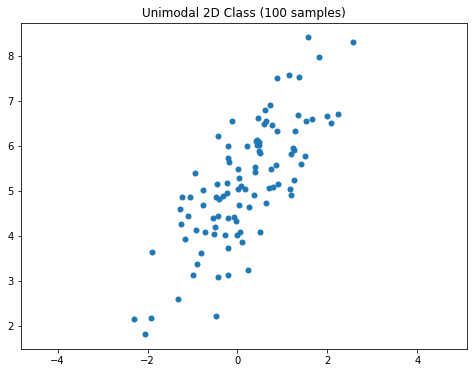

In [14]:
plot_dataset(dataset, 'Unimodal 2D Class (' + str(len(dataset)) + ' samples)')

## Get True Density

In [15]:
true_density = get_gaussian_density(dataset, mean, cov)

## Plot True Density

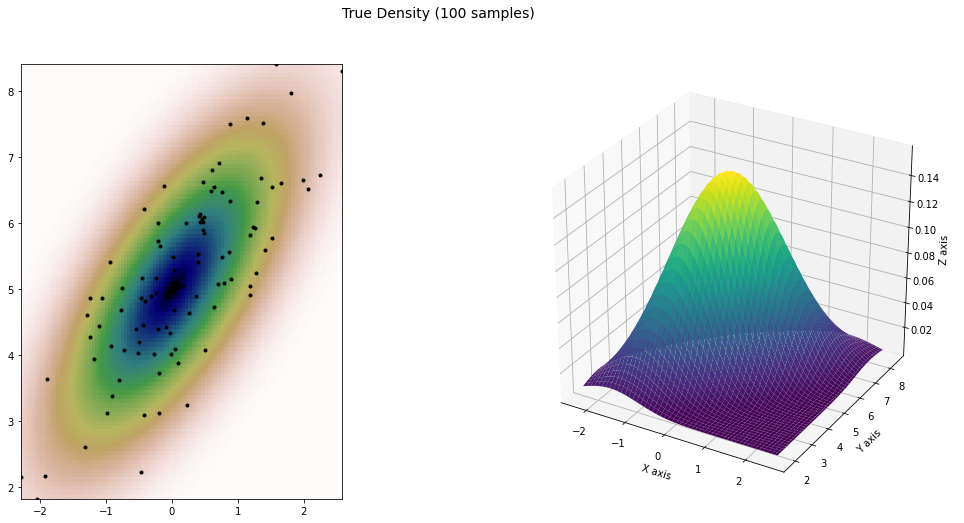

In [16]:
plot_density(true_density, dataset, 'True Density (' + str(len(dataset)) + ' samples)')

## Maximum Likelihood Estimation

### Estimate Parameters

In [17]:
estimated_mean = dataset.mean()
estimated_mean

0    0.168967
1    5.184237
dtype: float64

In [18]:
estimated_cov = dataset.cov()
estimated_cov

,0,1
0,0.944566,0.992548
1,0.992548,1.791129


### Estimate Density

In [19]:
estimated_density = get_gaussian_density(dataset, estimated_mean, estimated_cov)

### Plot Density

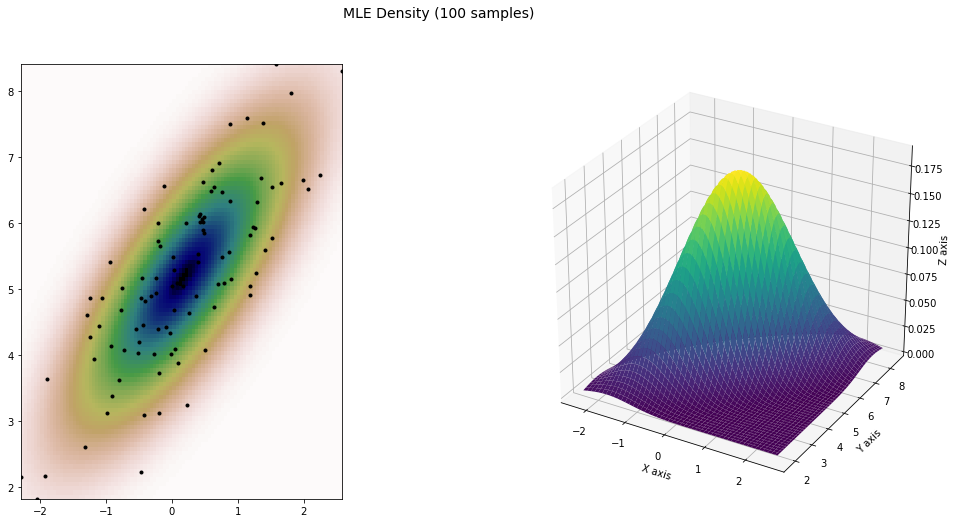

In [20]:
plot_density(estimated_density, dataset, 'MLE Density (' + str(len(dataset)) + ' samples)')

### Calculate Bias & Variance of Estimations

In [21]:
number_of_estimation = 20
estimated_means = list()
estimated_covs = list()
for index in range(number_of_estimation):
  dataset = get_dataset(mean, cov, sample_size)
  estimated_means.append(dataset.mean())
  estimated_covs.append(dataset.cov())

In [22]:
bias_mean = get_bias(estimated_means, mean)
bias_mean

0    0.019589
1    0.048204
dtype: float64

In [23]:
variance_mean = get_variance(estimated_means)
variance_mean

0    0.007483
1    0.016579
dtype: float64

In [24]:
bias_cov = get_bias(estimated_covs, cov)
bias_cov

,0,1
0,-0.012565,-0.036575
1,-0.036575,-0.060997


In [25]:
variance_cov = get_variance(estimated_covs)
variance_cov

,0,1
0,0.020089,0.030232
1,0.030232,0.101384


### Plot Bias & Variance

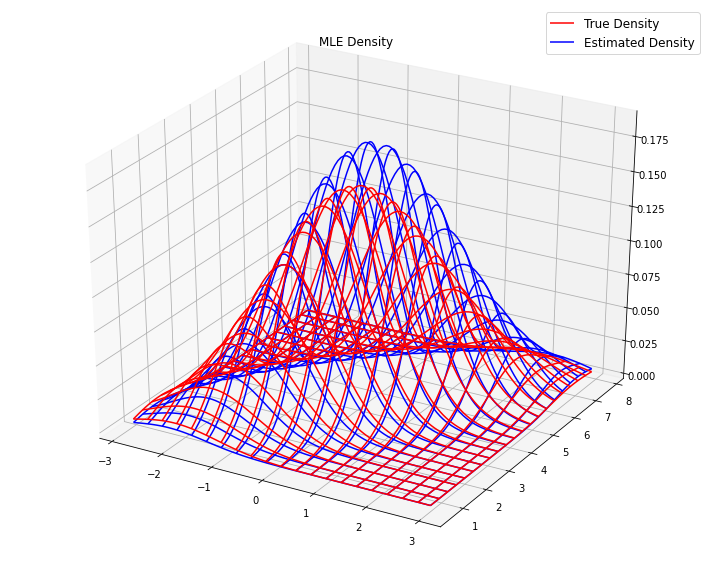

In [26]:
plot_bias_variance(true_density, estimated_density, dataset, 'MLE Density')

## Maximum a Posteriori Estimation

### Estimate Parameters
Estimate Mean With MAP Estimator When Covariance in known

In [27]:
def get_map_mean(dataset, prior_mean, prior_cov):
  number_of_features = dataset.shape[1]
  return [(prior_mean[i] + (prior_cov[i][i] / cov[i][i]) * dataset.iloc[:, i].sum()) / (1 + (prior_cov[i][i] / cov[i][i]) * sample_size) for i in range(number_of_features)]

In [28]:
prior_mean = np.array([0, 0])
prior_cov = np.array([[10, 0], [0, 10]])

In [29]:
estimated_mean = get_map_mean(dataset, prior_mean, prior_cov)
estimated_mean

[-0.05886065430065759, 4.94018268309544]

### Estimate Density

In [30]:
estimated_density = get_gaussian_density(dataset, estimated_mean, cov)

### Plot Density

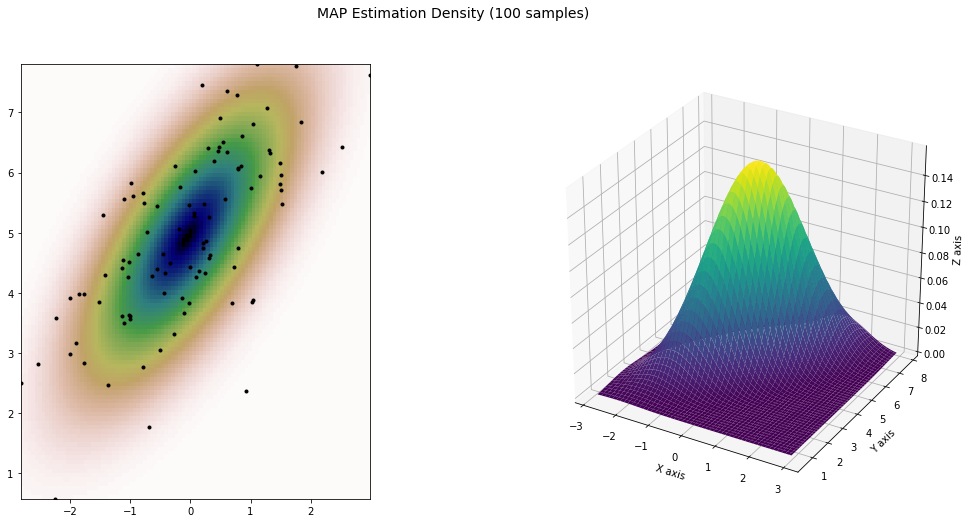

In [31]:
plot_density(estimated_density, dataset, 'MAP Estimation Density (' + str(len(dataset)) + ' samples)')

### Plot Bias & Variance

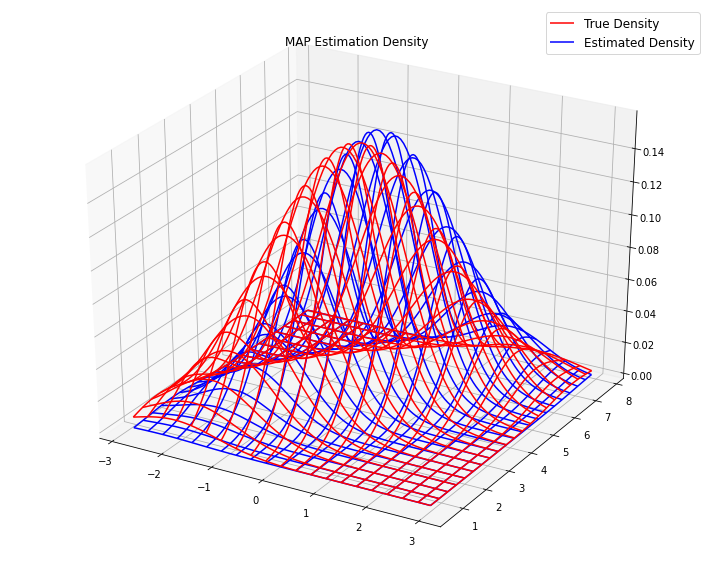

In [32]:
plot_bias_variance(true_density, estimated_density, dataset, 'MAP Estimation Density')